In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
include("src/spiking.jl")
include("src/vsa.jl")

similarity_outer (generic function with 2 methods)

In [3]:
using Plots

In [4]:
n_x = 101
n_y = 101
n_vsa = 1

1

In [5]:
repeats = 6

6

In [6]:
phases = collect([[x, y] for x in range(-1.0, 1.0, n_x), y in range(-1.0, 1.0, n_y)]) |> stack
phases = reshape(phases, (1,2,:))

1×2×10201 Array{Float64, 3}:
[:, :, 1] =
 -1.0  -1.0

[:, :, 2] =
 -0.98  -1.0

[:, :, 3] =
 -0.96  -1.0

;;; … 

[:, :, 10199] =
 0.96  1.0

[:, :, 10200] =
 0.98  1.0

[:, :, 10201] =
 1.0  1.0

In [7]:
b = bundle(phases, dims=2)

1×1×10201 Array{Float64, 3}:
[:, :, 1] =
 0.999999972172465

[:, :, 2] =
 -0.9900000275492599

[:, :, 3] =
 -0.9800000272709845

;;; … 

[:, :, 10199] =
 0.9800000272709845

[:, :, 10200] =
 0.9900000275492599

[:, :, 10201] =
 -0.999999972172465

In [8]:
spk_args = default_spk_args()

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.02 (V)


In [9]:
tspan = (0.0, repeats*1.0)

(0.0, 6.0)

In [10]:
st = phase_to_train(phases, spk_args, repeats = repeats)

Spike Train: (1, 2, 10201) with 122412 spikes.

In [12]:
st

Spike Train: (1, 2, 10201) with 122412 spikes.

In [13]:
function bundle(x::SpikeTrain; dims::Int, tspan::Tuple{<:Real, <:Real} = (0.0, 10.0), spk_args::SpikingArgs=default_spk_args(), return_solution::Bool=false)
    #let compartments resonate in sync with inputs
    sol = phase_memory(x, tspan=tspan, spk_args=spk_args)
    #extract their potentials
    u = Array(sol)
    #combine the potentials (interfere) along the bundling axis
    bundled = sum(u, dims=dims)
    if return_solution
        return bundled
    end
    
    #detect spiking outputs
    new_dims = setdiff(1:ndims(bundled), dims)
    out_shape = (size(bundled, d) for d in new_dims)
    out_inds, out_tms = find_spikes_rf(bundled, sol.t, spk_args)
    out_offset = x.offset + spiking_offset(spk_args)
    out_train = SpikeTrain(out_inds, out_tms, out_shape, out_offset)
    return out_train
end

bundle (generic function with 2 methods)

In [14]:
b2 = bundle(st, dims=2, return_solution=true)

1×1×10201×1001 Array{ComplexF32, 4}:
[:, :, 1, 1] =
 0.0f0 + 0.0f0im

[:, :, 2, 1] =
 0.0f0 + 0.0f0im

[:, :, 3, 1] =
 0.0f0 + 0.0f0im

;;; … 

[:, :, 10199, 1] =
 0.0f0 + 0.0f0im

[:, :, 10200, 1] =
 0.0f0 + 0.0f0im

[:, :, 10201, 1] =
 0.0f0 + 0.0f0im

[:, :, 1, 2] =
 0.01998f0 + 0.0006283185f0im

[:, :, 2, 2] =
 0.01998f0 + 0.0006283185f0im

[:, :, 3, 2] =
 0.01499f0 + 0.00031415926f0im

;;; … 

[:, :, 10199, 2] =
 0.0f0 + 0.0f0im

[:, :, 10200, 2] =
 0.0f0 + 0.0f0im

[:, :, 10201, 2] =
 0.0f0 + 0.0f0im

[:, :, 1, 3] =
 0.029841242f0 + 0.0025070112f0im

[:, :, 2, 3] =
 0.034841243f0 + 0.0025070112f0im

[:, :, 3, 3] =
 0.02989076f0 + 0.0018811958f0im

;;; … 

[:, :, 10199, 3] =
 0.0f0 + 0.0f0im

[:, :, 10200, 3] =
 0.0f0 + 0.0f0im

[:, :, 10201, 3] =
 0.0f0 + 0.0f0im

;;;; … 

[:, :, 1, 999] =
 0.08099368f0 - 0.003253679f0im

[:, :, 2, 999] =
 0.08224127f0 - 0.0059601604f0im

[:, :, 3, 999] =
 0.08264153f0 - 0.008688061f0im

;;; … 

[:, :, 10199, 999] =
 0.10366185f0 + 0.000988184f0i

In [6]:
n_angles = 101

101

In [7]:
phases = reshape(range(start = -1.0, stop = 1.0, length = n_angles) |> collect, (1, n_angles))

1×101 Matrix{Float64}:
 -1.0  -0.98  -0.96  -0.94  -0.92  -0.9  …  0.9  0.92  0.94  0.96  0.98  1.0

In [8]:
phases = vcat(phases, zero(phases))

2×101 Matrix{Float64}:
 -1.0  -0.98  -0.96  -0.94  -0.92  -0.9  …  0.9  0.92  0.94  0.96  0.98  1.0
  0.0   0.0    0.0    0.0    0.0    0.0     0.0  0.0   0.0   0.0   0.0   0.0

In [9]:
b = bundle(phases, dims=1)

1×101 Matrix{Float64}:
 0.5  -0.49  -0.48  -0.47  -0.46  …  0.45  0.46  0.47  0.48  0.49  -0.5

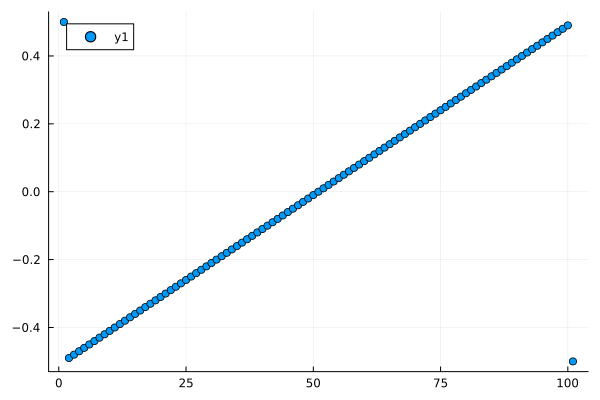

In [10]:
scatter(b |> vec)

In [11]:
spk_args = SpikingArgs()

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.02 (V)


In [12]:
st_p = phase_to_train(phases, spk_args, repeats = repeats)

Spike Train: (2, 101) with 1212 spikes.

In [13]:
using OrdinaryDiffEq

In [14]:
sol_phase = phase_memory(st_p, tspan=tspan, spk_args=spk_args);

In [15]:
u_phase = Array(sol_phase);

In [16]:
normalized = normalize_potential.(u_phase);

In [17]:
normalized |> size

(2, 101, 601)

In [18]:
normalized = u_phase

2×101×601 Array{ComplexF32, 3}:
[:, :, 1] =
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im

[:, :, 2] =
 0.00999+0.000314159im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
     0.0+0.0im             0.0+0.0im  0.0+0.0im  0.0+0.0im

[:, :, 3] =
 0.0149206+0.00125351im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
       0.0+0.0im            0.0+0.0im  0.0+0.0im  0.0+0.0im

;;; … 

[:, :, 599] =
 0.0901273-0.00511716im  0.0928058-0.0111906im   …  0.0906329-0.00447085im
 -0.104622+0.00553889im  -0.104622+0.00553889im     -0.104622+0.00553889im

[:, :, 600] =
 0.0900902+0.000554699im  0.0931389-0.00532669im  …   0.100543+0.00154431im
 -0.104554-0.00104354im   -0.104554-0.00104354im     -0.104554-0.00104354im

[:, :, 601] =
 0.0896976+0.00620171im  0.0931029+0.000534851im  …   0.110037+0.00815702im
 -0.104073-0.00759555im  -0.104073-0.00759555im      -0.104073-0.00759555im

In [19]:
u_bundle = sum(normalized, dims=1);

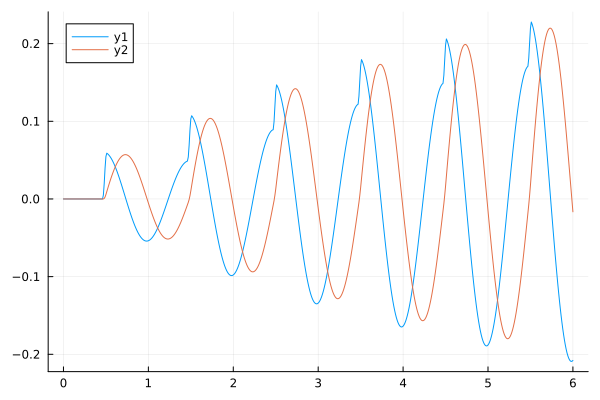

In [20]:
plot(sol_phase.t, real.(u_bundle[1,50,:]))
plot!(sol_phase.t, imag.(u_bundle[1,50,:]))

In [21]:
ndims(u_bundle)

3

In [22]:
setdiff(1:3, 2)

2-element Vector{Int64}:
 1
 3

In [23]:
spk_out = find_spikes_rf(u_bundle, sol_phase.t, spk_args, reverse=false)

(CartesianIndex{2}[CartesianIndex(1, 2), CartesianIndex(1, 3), CartesianIndex(1, 4), CartesianIndex(1, 5), CartesianIndex(1, 6), CartesianIndex(1, 7), CartesianIndex(1, 8), CartesianIndex(1, 9), CartesianIndex(1, 10), CartesianIndex(1, 11)  …  CartesianIndex(1, 86), CartesianIndex(1, 87), CartesianIndex(1, 88), CartesianIndex(1, 89), CartesianIndex(1, 90), CartesianIndex(1, 91), CartesianIndex(1, 92), CartesianIndex(1, 93), CartesianIndex(1, 94), CartesianIndex(1, 95)], [0.26000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.3300000000000001  …  5.919999999999918, 5.929999999999918, 5.939999999999918, 5.939999999999918, 5.949999999999918, 5.959999999999917, 5.969999999999917, 5.969999999999917, 5.979999999999917, 5.989999999999917])

In [24]:
spk_out[2]

693-element Vector{Float64}:
 0.26000000000000006
 0.26000000000000006
 0.2700000000000001
 0.2700000000000001
 0.2800000000000001
 0.2900000000000001
 0.3100000000000001
 0.3200000000000001
 0.3300000000000001
 0.3300000000000001
 ⋮
 5.929999999999918
 5.939999999999918
 5.939999999999918
 5.949999999999918
 5.959999999999917
 5.969999999999917
 5.969999999999917
 5.979999999999917
 5.989999999999917

In [25]:
train_out = SpikeTrain(spk_out[1], spk_out[2], size(u_bundle)[1:2], spk_args.t_period / 4)

Spike Train: (1, 101) with 693 spikes.

In [26]:
phase_out = train_to_phase(train_out, spk_args);

In [27]:
phase_out[1,:,:]

1×101 Matrix{Float64}:
 NaN  -0.98  -0.98  -0.96  -0.96  -0.94  …  -0.04  -0.04  -0.04  -0.04  -0.04

In [28]:
phase_out[1,:,50]

1-element Vector{Float64}:
 -0.03999999999999915

In [29]:
(mod((sol_phase.t[575] - 0.25), 1.0) - 0.5) * 2

-0.020000000000155893

In [30]:
size(phase_out)

(6, 1, 101)

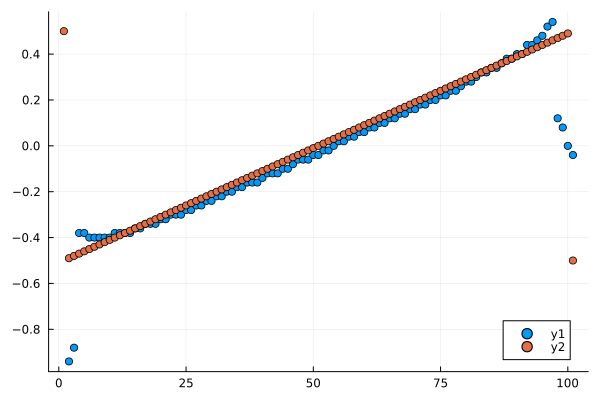

In [31]:
scatter(phase_out[4,:,:] |> vec)
scatter!(b |> vec)

In [32]:
err = vec(phase_out[4,:,:] .- b);

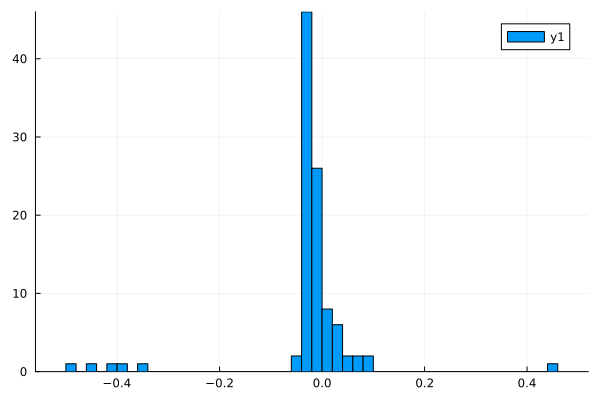

In [33]:
histogram(err)